In [81]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import sys
import json

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from src.api import ai_client
from src.utils import *
from src.const import *
from src.plots import *
from src.signal_providers.signal_manager import *
from src.news_providers.news_api_provider import *
from src.agents.news_filtering_agent import *
from src.agents.trading_agent import *
from src.agents.supervisor_trader import SupervisorTrader
from src.agents.marginal_agent import MarginalAgent
from src.agents.supervisor_margin_trader import SupervisorMarginTrader
from src.news_providers.tradingview_provider import TradingViewProvider

%load_ext autoreload
%autoreload 2

sns.set_theme(style="darkgrid")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
coin = "ETH"

cutoff = get_current_datetime()
str(cutoff)

'2024-04-22 18:42:10.997776'

In [144]:
day_history = get_day_history(coin)
week_history = get_week_history(coin)
month_history = get_month_history(coin)
year_history = get_year_history(coin)

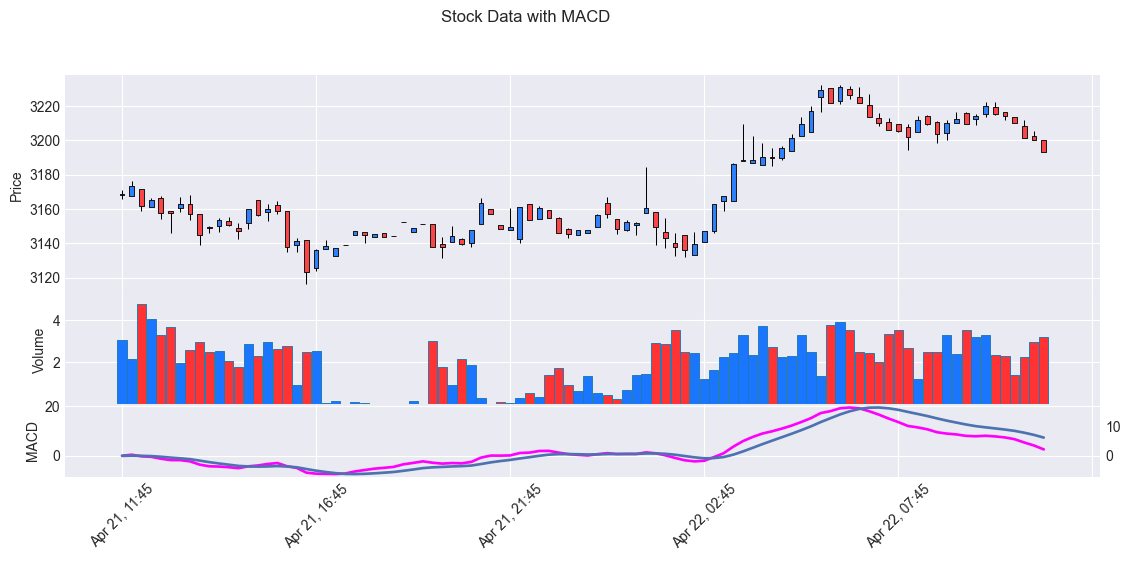

In [145]:
make_candlebars(day_history)

In [146]:
napi = TradingViewProvider()
trading_agent = SupervisorMarginTrader()
filtering_agent = NewsFilteringAgent()

In [147]:
news = napi.get_news(coin)
news

[{'source': 'cointelegraph',
  'title': 'Woo X exchange launches world’s first tokenized T-bills for retail ',
  'description': 'Woo X cryptocurrency exchange has launched tokenized Treasury Bills (T-Bills), claiming to be the first protocol to offer tokenized T-Bills for retail investors., according to an April 22 X post.Woo X launched its real-world–asset (RWA) tokenization vaults, RWA Earn Vaults, enabling users to earn yield by holding Circle’s USD Coin “With the RWA Earn Vaults, all @WOO_X users can now earn stable, predictable yield on their USDC holdings backed by U.S. Treasury Bills without having to jump through any extra hoops.”Backed solely by U.S. T-bills, RWA Earn Vaults offer between 4.5% and 4.7% annual percentage rate (APR) to USDC holders. According to the announcement:“User subscriptions accumulate real yields, fully backed by U.S. Treasury Bills, with current APRs for 7-day and 28-day terms at ~4.5% and ~4.75% respectively.”Hashing It Out: Are RWAs the future of cryp

In [148]:
filtered_news = filtering_agent.filter_news(coin, news[:30])
json.loads(filtered_news)

{'description': "Recent developments surrounding ETH and associated cryptocurrency projects illustrate a dynamic market with multiple influences. Notably, Ethereum has seen significant activity with ETH leaving exchanges, suggesting a strong accumulation phase among investors. This move, identified by tracking large transactions, indicates a sustained bullish sentiment despite market volatility. Moreover, TRON founder Justin Sun's hefty accumulation of ETH further underlines the market's strong liquidity and institutional interest, hinting at potential future growth. Ethereum's involvement in tokenization projects and interest from major players like BlackRock in tokenized real-world assets (RWA) also contribute positively. However, challenges like potential yield reductions in Ethereum's staking ecosystem and the broader regulatory environment continue to pose risks.",
 'sentiment': 'Generally positive',
 'sentiment_description': "The sentiment around Ethereum is generally positive du

In [149]:
balance = {coin: 0, "USDT": 1000}
operations_history = []

[{'role': 'system', 'content': "You are professional futures trader with an extensive understanding of cryptocurrency markets. \n                \n                Respond with JSON of described format.\n                Guidelines:\n                - Do not buy on everything you have, distribute spendings!\n                - Feel free to sell all if selling improves total net_worth of acccount\n                - Consider historical market data and recent news.\n                - Use only money from your 'balance'\n                \n                Your ultimate goal is to make make as much profit as possible\n                "}, {'role': 'user', 'content': [{'type': 'text', 'text': 'This is price history of this coin in the last day. Current price: 3193'}, {'type': 'image_url', 'image_url': {'url': '', 'detail': 'high'}}]}, {'role': 'user', 'content': [{'type': 'text', 'text': 'This is price history of this coin in the last week'}, {'type': 'image_url', 'image_url': {'url': '', 'detail'
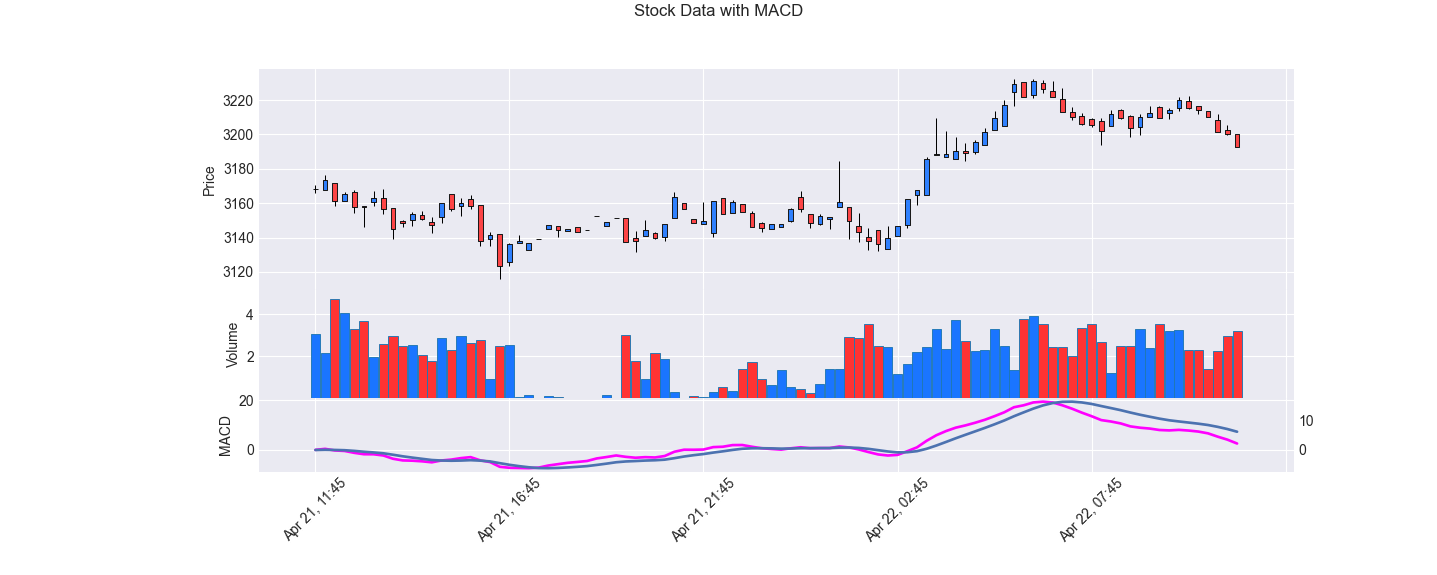
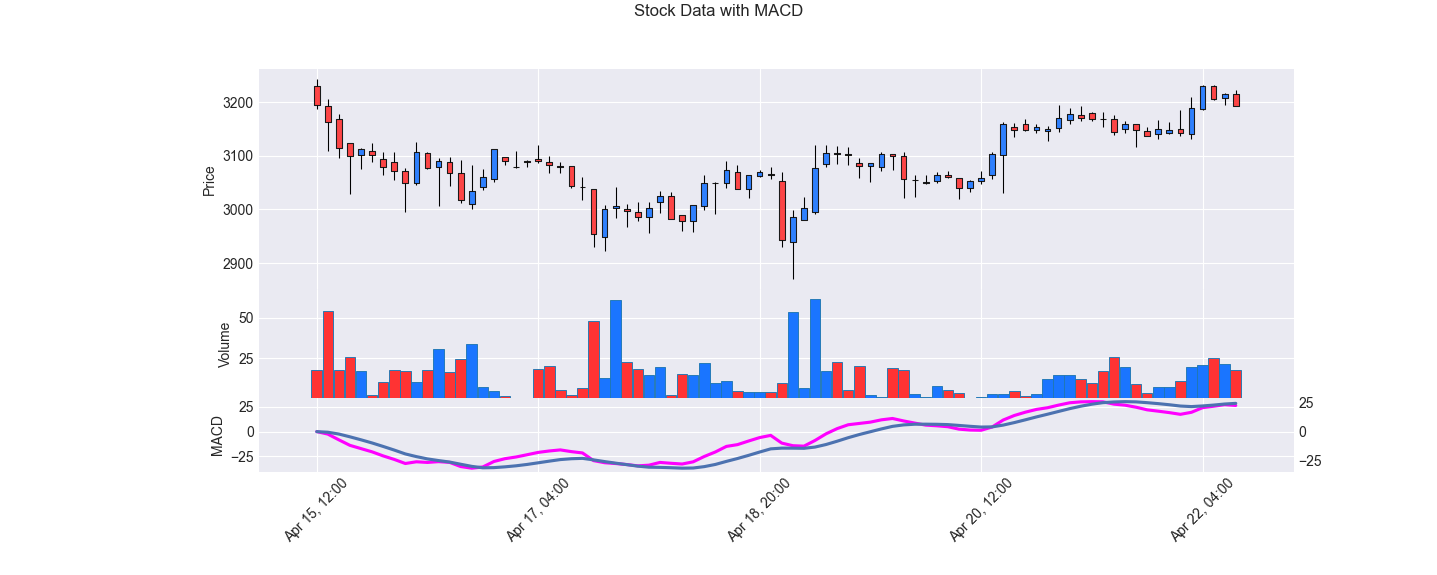
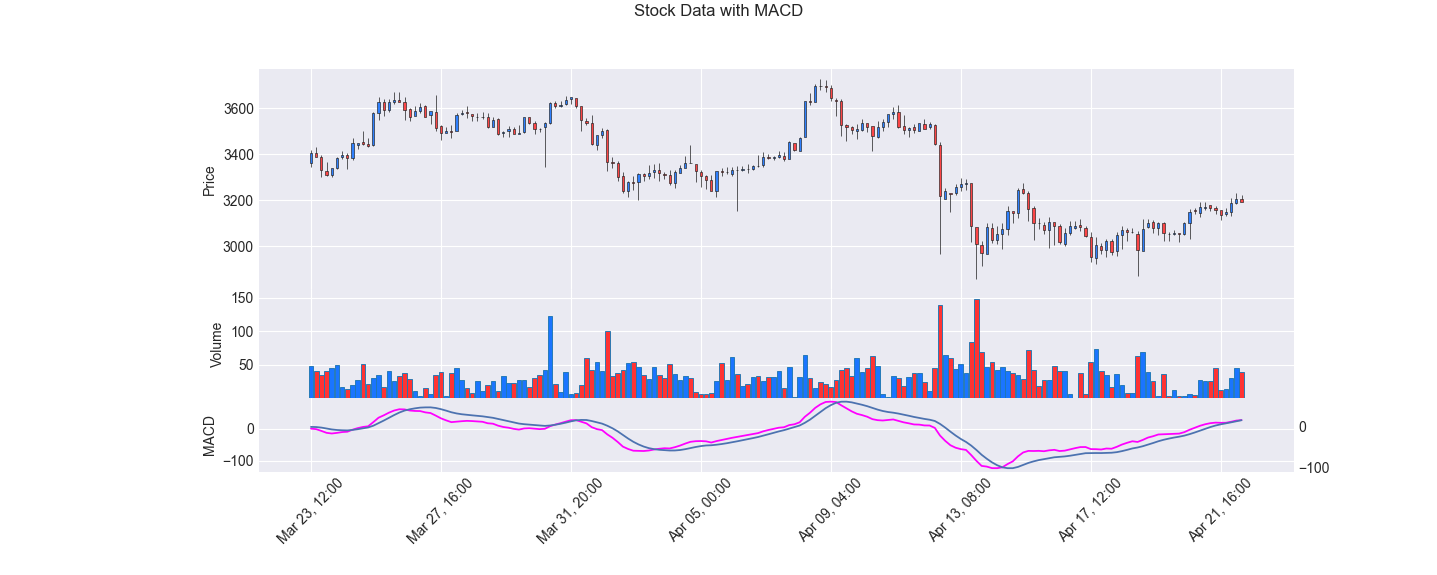

{'strategy_evaluation': 'The strategy to buy futures and leverage the current bullish sentiment in the Ethereum market is sensible. This is based on positive market news, technical indicators showing potential upward movement, and general market enthusiasm. However, risk management should be maintained, especially considering the volatility of cryptocurrency markets.',
 'calculations_evaluation': 'Previous calculations for the amount of coin to invest seem to be incorrect. Given a balance of $1000 and a desire to use up to 1x leverage at a price of $3193, one should be able to take a position equivalent to 0.31 ETH (considering also the stop-loss and take-profit levels to manage risk actively).',
 'changes_description': 'After recalculating, the amount of 0.31 ETH for the futures contract holds if buying using $1000 and maintaining 1x leverage. Stop-loss and take-profit levels are adjusted slightly to accommodate a good risk-reward ratio, keeping in mind market volatility.',
 'trend_an

In [150]:
predict, _ = trading_agent.decide(
    coin=coin,
    news=filtered_news,
    day_data=day_history,
    week_data=week_history,
    month_data=month_history,
    #year_data=year_history,
    operations_history=operations_history,
    current_balance=balance,
    leverage="1x",
    verbose=True,
)

result = json.loads(predict)
result